In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as ws
ws.filterwarnings("ignore")

In [2]:
df = pd.read_csv("clg.csv")

In [3]:
df.head()

,education,income,women,prestige,census,type
0,13.11,12351,11.16,68.8,1113,prof
1,12.26,25879,4.02,69.1,1130,prof
2,12.77,9271,15.70,63.4,1171,prof
3,11.42,8865,9.11,56.8,1175,prof
4,14.62,8403,11.68,73.5,2111,prof


In [4]:
df.type.value_counts()

bc      44
prof    31
wc      23
Name: type, dtype: int64

In [6]:
df.shape

(102, 6)

In [7]:
df.isna().sum()

education    0
income       0
women        0
prestige     0
census       0
type         4
dtype: int64

In [8]:
df.fillna("bc", inplace = True)

In [9]:
df.isna().sum()

education    0
income       0
women        0
prestige     0
census       0
type         0
dtype: int64

In [44]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
data = encode.fit_transform(df["type"])

In [45]:
df.type = data

In [46]:
df.head()

,education,income,women,prestige,census,type
0,13.11,12351,11.16,68.8,1113,1
1,12.26,25879,4.02,69.1,1130,1
2,12.77,9271,15.70,63.4,1171,1
3,11.42,8865,9.11,56.8,1175,1
4,14.62,8403,11.68,73.5,2111,1


In [47]:
tp = df.type.value_counts().reset_index()

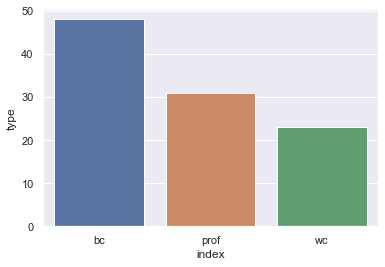

In [31]:
sns.set()
sns.barplot(x="index", y= "type", data = tp)

In [32]:
#  Scaling the data
from sklearn.preprocessing import StandardScaler

In [34]:
 scaler = StandardScaler()

In [48]:
from sklearn.model_selection import train_test_split
X = df.drop(columns="type")
y = df["type"]
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)


In [49]:
scaled = scaler.fit_transform(X_train)

In [50]:
print(scaled)

[[ 2.57508973e-01 -1.52515784e-01  4.27163583e-01 -6.69945862e-01
  -4.41929365e-01]
 [ 1.45229697e+00  3.46655003e-01 -4.75120563e-01  1.52225275e+00
  -1.22672221e+00]
 [ 5.68378578e-01  4.41545569e+00 -7.26539136e-01  1.26707619e+00
  -1.59650212e+00]
 [ 1.40735197e+00 -5.18745097e-01 -7.22600464e-01  1.48165648e+00
  -1.07594548e+00]
 [ 1.67702199e+00  6.23713415e-01  2.86684276e-01  6.40733731e-01
  -1.12117850e+00]
 [-1.19945821e+00 -6.32129506e-01  2.34496870e-01 -4.84362911e-01
   1.07337669e+00]
 [ 1.88301992e+00  2.87510404e+00 -6.90106418e-01  2.03260586e+00
  -1.13927171e+00]
 [-1.46163739e+00 -7.61578647e-01 -7.40324488e-01 -1.82790615e-01
   6.58363766e-01]
 [-8.88588605e-01 -5.03146010e-01 -8.58484653e-01 -1.22669472e+00
   1.48801268e+00]
 [ 1.45146466e-01  4.34428970e-01 -7.54766286e-01 -4.08969837e-01
  -8.76040679e-02]
 [-1.43167406e+00 -3.76025092e-01 -8.40104183e-01 -4.84362911e-01
   1.28747964e+00]
 [ 1.35491613e+00  1.14298452e-01  7.26174444e-01  1.60344529e+00

In [51]:
scaled_test = scaler.transform(X_test)

In [52]:
# Training the multiclass classifier

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train_scaled = scaled
X_test_scaled = scaled_test

In [59]:
X.head()

,education,income,women,prestige,census
0,13.11,12351,11.16,68.8,1113
1,12.26,25879,4.02,69.1,1130
2,12.77,9271,15.70,63.4,1171
3,11.42,8865,9.11,56.8,1175
4,14.62,8403,11.68,73.5,2111


In [87]:
logistic = LogisticRegression()
logistic.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
# Training score
print(logistic.score(X_train_scaled, y_train))

0.8641975308641975


In [91]:
# Testing score
print(logistic.score(X_test_scaled, y_test))

0.9523809523809523


In [65]:
# evaluating the model
from sklearn.metrics import classification_report, confusion_matrix

In [67]:
y_pred = logistic.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.86      1.00      0.92         6
           2       1.00      0.80      0.89         5

    accuracy                           0.95        21
   macro avg       0.95      0.93      0.94        21
weighted avg       0.96      0.95      0.95        21



In [68]:
# Looks like the model is good

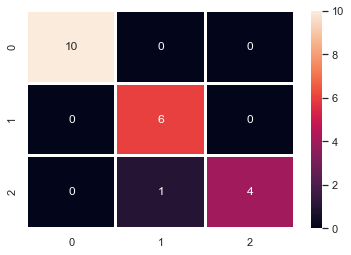

In [70]:
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot = True, fmt = ".2g", linewidths = 2)
plt.show()

In [80]:
# Accuracy of the Logistic Regression
from sklearn.metrics import accuracy_score
print("The Accuracy of logistic regresson " , round (accuracy_score(y_test, y_pred) * 100, 2), "%")

The Accuracy of logistic regresson  95.24 %


In [82]:
# Fitting the more complex model
from sklearn.ensemble import RandomForestClassifier

In [83]:
rfe = RandomForestClassifier(n_estimators=100, random_state=42)

In [84]:
rfe.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [86]:
rfe.score(X_train_scaled, y_train)

1.0

In [93]:
rfe.score(X_test_scaled, y_test)

0.9523809523809523

In [94]:
# looks like the score shows that the model is overfitting the data 

In [96]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(logistic, f)

In [97]:
# Done 